In [20]:
pip install kagglehub pandas numpy matplotlib seaborn scikit-learn joblib streamlit

Temperature (°C)            0
Humidity (%)                0
Occupancy                   0
Energy Consumption (kWh)    0
dtype: int64


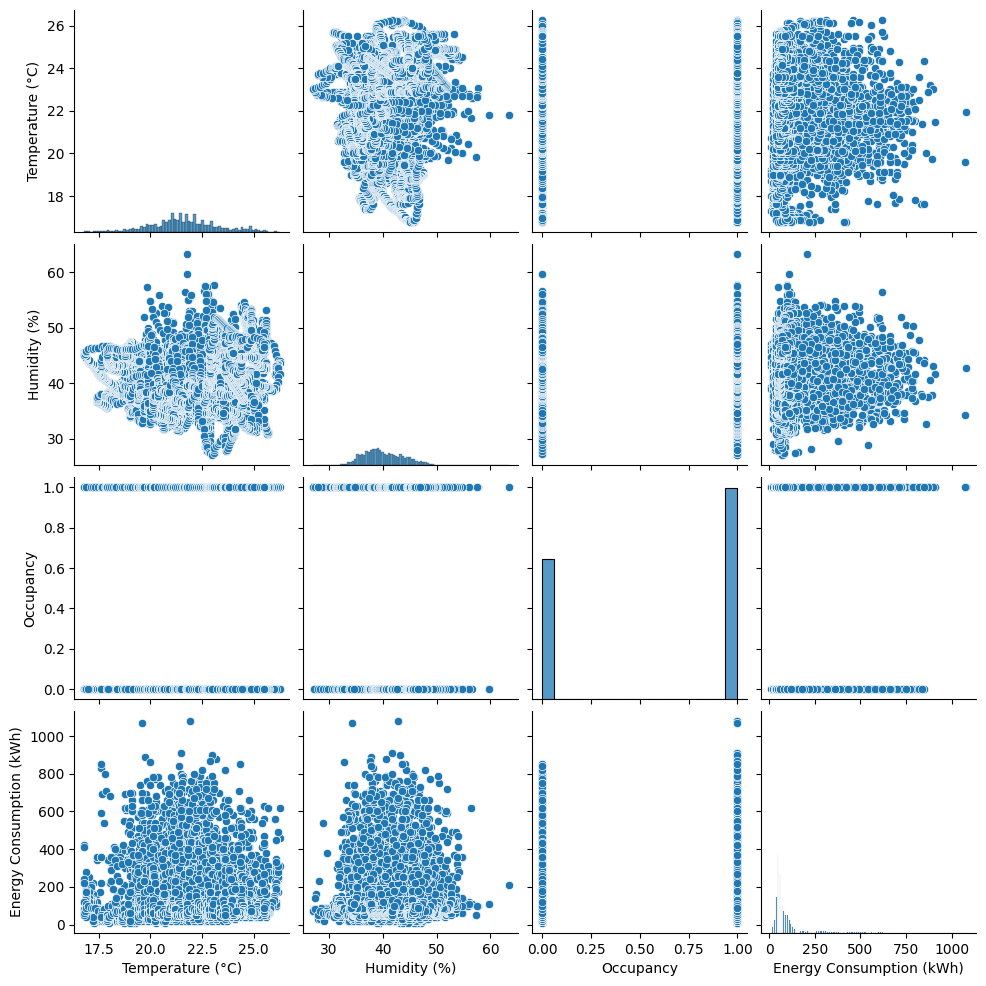

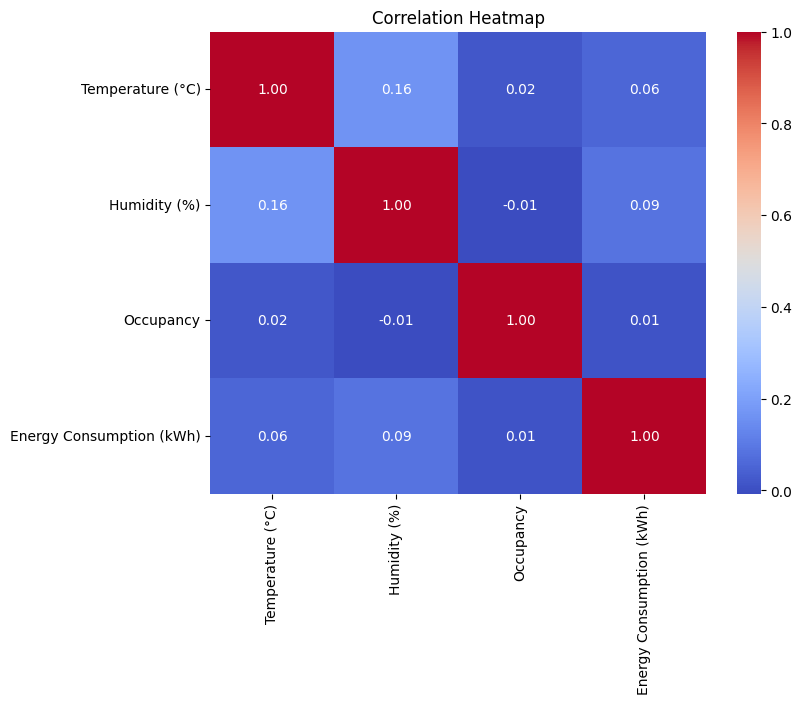

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Cleaned_Energy_Data.csv')

# Check for missing values
print(data.isnull().sum())

# Visualize the data
sns.pairplot(data)
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# Normalize the continuous variables
scaler = StandardScaler()
data[['Temperature (°C)', 'Humidity (%)']] = scaler.fit_transform(data[['Temperature (°C)', 'Humidity (%)']])


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Define features and target
X = data[['Temperature (°C)', 'Humidity (%)', 'Occupancy']]
y = data['Energy Consumption (kWh)']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = Ridge()
model.fit(X_train, y_train)

# Test the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 9926.357795566808


In [23]:
import streamlit as st
import numpy as np

# Streamlit app
st.title("Energy Consumption Prediction")

# Input fields
temperature = st.number_input("Temperature (°C)")
humidity = st.number_input("Humidity (%)")
occupancy = st.radio("Occupancy", (0, 1))

# Prediction button
if st.button("Predict"):
    input_features = np.array([[temperature, humidity, occupancy]])
    prediction = model.predict(input_features)[0]
    st.write(f"Predicted Energy Consumption: {prediction:.2f} kWh")


2024-12-01 18:29:55.355 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-01 18:29:55.362 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-01 18:29:55.367 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-01 18:29:55.371 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-01 18:29:55.377 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-01 18:29:55.380 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-01 18:29:55.384 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-01 18:29:55.386 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [25]:
import joblib

# Save the model
joblib.dump(model, 'ridge_model.pkl')

['ridge_model.pkl']